# Machine Translation

## Imports

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
sns.set()

## Vector Manipulation

- Scaling
- Translation
- Rotation

In [ ]:
R = np.array([[2, 0],
              [0, -2]])
R.shape

(2, 2)

In [ ]:
x = np.array([1, 1])
y = x@R; y

array([ 2, -2])

In [ ]:
vectors = [x, y]; vectors

[array([1, 1]), array([ 2, -2])]

In [ ]:
# Procedure to plot and arrows that represents vectors with pyplot
# def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
#     scale = 1
#     scale_units = 'x'
#     x_dir = []
#     y_dir = []
    
#     for i, vec in enumerate(vectors):
#         x_dir.append(vec[0][0])
#         y_dir.append(vec[0][1])
    
#     if ax == None:
#         fig, ax2 = plt.subplots()
#     else:
#         ax2 = ax
      
#     if axes == None:
#         x_axis = 2 + np.max(np.abs(x_dir))
#         y_axis = 2 + np.max(np.abs(y_dir))
#     else:
#         x_axis = axes[0]
#         y_axis = axes[1]
        
#     ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
#     for i, vec in enumerate(vectors):
#         ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
#     if ax == None:
#         plt.show()
#         fig.savefig(fname)

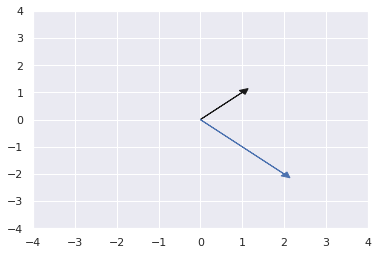

In [ ]:
xaxis = 4
yaxis = 4
fig, ax = plt.subplots(); ax
colors = ['k', 'b', 'r', 'm', 'c']
ax.axis([-xaxis, xaxis, -yaxis, yaxis])
ax.arrow(0,0, x[0], x[1], head_width=0.05*xaxis, head_length=0.05*yaxis, fc=colors[0], ec=colors[0])
ax.arrow(0,0, y[0], y[1], head_width=0.05*xaxis, head_length=0.05*yaxis, fc=colors[1], ec=colors[1])

## Frobenius Norm

In [ ]:
A = np.array([[2,2], [2,2]])
np.linalg.norm(A)

4.0

In [ ]:
np.sqrt(np.sum(np.square(A)))

4.0

## Basic Hashing

In [ ]:
x = np.random.randint(1,100,20)
x

array([63, 18, 16, 14, 88, 96, 76,  3, 35, 64, 43, 19, 37,  8, 74, 24, 21,
       75, 26, 57])

In [ ]:
def hash_function(val, n_buckets=10):
    return val%n_buckets
def basic_hashing(values, n_buckets=10, hf=hash_function):
    hash_table = {b:[] for b in range(n_buckets)}
    for val in values:
        b = hf(val, n_buckets)
        hash_table[b].append(val)
    return hash_table
basic_hashing(x)

{0: [],
 1: [21],
 2: [],
 3: [63, 3, 43],
 4: [14, 64, 74, 24],
 5: [35, 75],
 6: [16, 96, 76, 26],
 7: [37, 57],
 8: [18, 88, 8],
 9: [19]}

In [ ]:
i = 40
hash_function(i, n_buckets=10)

0

## Locality Sensitive Hashing

- Need: Hashing function that is sensitive to location of items it's assigning into the buckets
- Reduces computational cost of finding k-nearest neighbours in high dimensional spaces
- Hash tables - Data structures based on dictionary. That allows to index data in order to improve heavy look up tasks. 


In [ ]:
a = np.array([1,2,-3])
np.sign(a)

array([ 1,  1, -1])

In [ ]:
a = np.array([[1]])
# np.asscalar(a) -> Depreciated
a.item()

1

[-1  1]


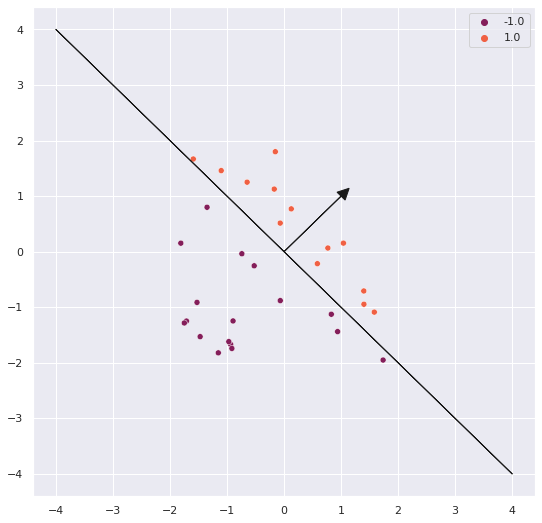

In [ ]:
P = np.array([1,1]); P
rot = np.array([[0, 1], [-1, 0]])
PT = P@rot
print(PT)
v = np.array([np.random.uniform(-2,2,2) for i in range(30)])
side_of_plane = np.sign(P@v.T)
x = v[:,0] 
y = v[:,1]
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x=x, y=y, hue=side_of_plane,palette=sns.color_palette("rocket", 2), ax=ax)
xaxis = 4
yaxis = 4
colors = ['k', 'b', 'r', 'm', 'c']
ax.arrow(0,0, P[0], P[1], head_width=0.05*xaxis, head_length=0.05*yaxis, fc=colors[0], ec=colors[0])
ax.arrow(0,0, PT[0]*4, PT[1]*4, fc=colors[0], ec=colors[0])
ax.arrow(0,0, PT[0]*-4, PT[1]*-4, fc=colors[0], ec=colors[0])

## Multi Plan Hash function 

In [ ]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = np.array([P1, P2, P3]) # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])
side_of_plane=(np.sign(P_l@v.T).ravel() >=0)*1



array([1, 2, 4])

In [ ]:
def hash_multi_planes(P_l:np.array, v:np.array):
    side_of_plane=(np.sign(P_l@v.T).ravel() >=0)*1
    return 2**np.arange(0,len(P_l),1)@side_of_plane.T

In [ ]:
hash_multi_planes(P_l, v)

3

In [ ]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [ ]:
hash_multi_planes(random_planes_matrix, v)

7

In [ ]:
np.linalg.norm(np.array([[1, 3],[4, 5]]))

7.14142842854285